# Sports Analytics for EPL Report



## Contributors:
* Ghizlane Rehioui
* Yashwanth Reddy
* Taahaa Dawe
* Dhruv Gupta



# Introduction
In the world of football analysis, data is the key to unlocking the game's secrets. This report focuses on our use of data from the reputable FBRef website (https://fbref.com/en/) to delve into the Premier League, covering the seasons from 2016-17 to 2023-24.

Our analysis goes beyond traditional points tables, delving into team performance metrics and shooting statistics for each match. With this extensive dataset, we aim to uncover the strategies, player performance, and dynamics that have shaped Premier League football.

In the following pages, we will explore trends, anomalies, and insights from seven seasons of Premier League action. This report serves as a valuable resource for football enthusiasts and analysts alike, highlighting the power of data in understanding the beautiful game. Join us on this data-driven journey through the heart of Premier League football!

# Column Description

The scraped data consists of 27 columns:
* 'date': Date of the match
* 'time': Time of match
* 'comp': Competition name
* 'round': Matchweek number
* 'day': Day of the week
* 'venue': Where the game is played (Away or Home)
* 'result': W for Win, D for Draw, and L for Loss
* 'goals_scored': Number of goals scored
* 'goals_conceded': Number of goals conceded
* 'opponent': Opponent team name
* 'expected_goals': Expected goals to score
* 'expected_assists': Expected assists provided
* 'possession': Duration for which the team had the ball possession
* 'attendance': Count of audience
* 'captain': Captain of team
* 'formation': Team formation
* 'referee': Referee name
* 'shots': Shots taken by team
* 'shots_on_target': Shots on target by team
* 'avg_shot_distance': Average shot distance
* 'freekicks': Freekicks taken
* 'penaltykicks': Penalties taken
* 'penaltykicks_opponent': Penalties given to opponent 
* 'season': Season year
* 'team': Team 


# Statement of the questions of interest

1.   Do the teams perform better at home or away?
2.   Which team are in the top 5% based on their wins?
3.   Total goals per season for the 5 best teams and their average in each season

First and foremost, before doing any analyis, it is important to acknowledge that we might encounter some biases in our analysis.

# Possible sources of bias
## Biases from web scraped data
Web scraping may be a great way to quickly access real time data. However, we might run into issues such as the untimely updates of important information, which could potentially lead to misinterpretations. Another possible source of bias would be to ask if the period between 2017-2023 is truly representative of the teams' performance or success.

## Biases related to Football as a game
Football is a highly *unpredictable* game. Due to the low scoring nature of the sport, a 'less qualified' team can easily win against a much more talented team. It is also easier to catch up in terms of points. Additionally, a simple mistake from a defender or keeper may be an easy opportunity for the opponent to score and win a match, especially during extra time. 

In addition to the low scoring nature of Football, Referee bias is a popular theory among Football fans, hypothesizing that referees play a huge role in the match, either favoring for or against a team. In fact, some fans strongly believe that that some referees turn a blind eye on some penalties, which could have made some teams easily qualify given that the opponent's team does not have a good goalkeeper. Other biases include seasonal bias or team/player bias related to the scouted or players involved in the match. 

## Choice of metrics - Measurement Bias
The choice of the metrics, i.e. the domain or industry knowledge, that drive our analysis or conclusions is crucial. In other words, the standardized matrics or parameters used in Football Analytics should be respected and using other metrics may lead to misinterpretations.

## Omitted variable bias 
In our analysis, we might fall into ommitted variable bias where we disregard some critical attributes that influence the outcome are missing.

In [31]:
!pip install pandasql

In [32]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sb
from pandasql import sqldf


# Data scraping code

The data utilized for this analysis was scraped from the FBRef website (https://fbref.com/en/), a reputable source for football statistics and history. 
The focus of this project was on gathering and analyzing individual team match data from the Premier League, spanning from the 2016-17 season to the current season, 2023-24. 
In addition to the points table information, we also retrieved crucial shooting statistics for each team in every match from the shooting table. 
This comprehensive dataset allows for a detailed exploration of team performance metrics and shooting proficiency within the Premier League during the specified timeframe.

**NOTE: The following section contains the craping code as a markdown because scraping takes more than one hour.**  

### Scraping page with requests

import requests
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

* Download the page
data = requests.get(standings_url)

print(data) # The response should be '200'. If it gives '429', then try again later as it is rate limiting.

### Parsing HTML links with BeautifulSoup

from bs4 import BeautifulSoup

import time

#Giving the browser time to complete the action and then come up with new sourcecode before reading it using beautifulsoup

soup = BeautifulSoup(data.text)

standings_table = soup.select('table.stats_table')[0]

links = standings_table.find_all('a')

links = [l.get("href") for l in links]

links = [l for l in links if '/squads/' in l]

team_urls = [f"https://fbref.com{l}" for l in links]

### Extracting match stats using pandas and requests

data = requests.get(team_urls[0])

import pandas as pd

matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

### Getting match shooting stats with requests and pandas

soup = BeautifulSoup(data.text)

links = soup.find_all('a')

links = [l.get("href") for l in links]

links = [l for l in links if l and 'all_comps/shooting/' in l]

data = requests.get(f"https://fbref.com{links[0]}")

shooting = pd.read_html(data.text, match="Shooting")[0]

shooting.head()

# Cleaning and merging scraped data with pandas

shooting.columns = shooting.columns.droplevel()

team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

team_data.head()

### Scraping data for multiple seasons and teams with a loop

from datetime import datetime

current_year = datetime.now().year

years = list(range(current_year, 2016, -1))

all_matches = []

years #The year'2016' is actually the season '2015-2016'. We use this everywhere which makes working with the data easier.

standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

for year in years:
    
    data = requests.get(standings_url)

    soup = BeautifulSoup(data.text)
    
    standings_table = soup.select('table.stats_table')[0]
    
    links = [l.get("href") for l in standings_table.find_all('a')]
    
    links = [l for l in links if '/squads/' in l]
    
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
    
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        
        data = requests.get(team_url)
        
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
        
        soup = BeautifulSoup(data.text)
        
        links = [l.get("href") for l in soup.find_all('a')]
        
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        
        data = requests.get(f"https://fbref.com{links[0]}")
        
        shooting = pd.read_html(data.text, match="Shooting")[0]
        
        shooting.columns = shooting.columns.droplevel()
        
        try:
        
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
        
            continue
            
        team_data = team_data[team_data["Comp"] == "Premier League"]
        
        team_data["Season"] = year
        
        team_data["Team"] = team_name
        
        all_matches.append(team_data)
        
        time.sleep(1)
        
        
len(all_matches)

match_df = pd.concat(all_matches) # Combining the individual dataframes into a single dataframe

### Data Cleaning

match_df.columns = [c.lower() for c in match_df.columns]

match_df.head()

match_df.shape

match_df["team"].value_counts()

match_df.isnull().sum()

match_df.columns

match_df.rename(columns = {'gf':'goals_scored', 
                'ga':'goals_conceded', 
                'xg':'expected_goals', 
                'xga':'expected_assists', 
                'poss':'possession', 
                'sh':'shots',
                'sot':'shots_on_target',
                'dist':'avg_shot_distance',
                'fk':'freekicks',
                'pk':'penaltykicks',
                'pkatt':'penaltykicks_opponent'},
                inplace=True
               )

match_df.head()   

match_df.drop(columns=['notes', 'match report'], inplace=True)

match_df.isnull().sum()

match_df.dtypes

match_df[["goals_scored", "goals_conceded"]] = match_df[["goals_scored", "goals_conceded"]].astype(int)

match_df.dtypes

match_df

match_df.to_csv("matches.csv")

### End Of Web Scrapping Code

# Data Cleaning

In [4]:
# Read in the data
df = pd.read_csv('matches.csv')
df.head(3)

,Unnamed: 0,date,time,comp,round,day,venue,result,goals_scored,goals_conceded,...,formation,referee,shots,shots_on_target,avg_shot_distance,freekicks,penaltykicks,penaltykicks_opponent,season,team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,...,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0.0,0.0,2023,Manchester City
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,...,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0.0,0.0,2023,Manchester City
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,...,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0.0,1.0,2023,Manchester City


In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'goals_scored', 'goals_conceded', 'opponent', 'expected_goals',
       'expected_assists', 'possession', 'attendance', 'captain', 'formation',
       'referee', 'shots', 'shots_on_target', 'avg_shot_distance', 'freekicks',
       'penaltykicks', 'penaltykicks_opponent', 'season', 'team'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)
df.head(3)

,date,time,comp,round,day,venue,result,goals_scored,goals_conceded,opponent,...,formation,referee,shots,shots_on_target,avg_shot_distance,freekicks,penaltykicks,penaltykicks_opponent,season,team
0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0.0,0.0,2023,Manchester City
1,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0.0,0.0,2023,Manchester City
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,...,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0.0,1.0,2023,Manchester City


# Exploratory Data Analysis

## 1. Goals Scored Home vs. Away

In [7]:
jj= df["team"].unique().tolist()
all_goals = []
new_df ={}
for i in range(len(jj)):
  all_goals.append(df[df["team"].str.contains(jj[i])]["goals_scored"].sum())

new_df={"Teams": jj ,"all_goals": all_goals}

new_df = pd.DataFrame(new_df)
new_df.head()

,Teams,all_goals
0,Manchester City,392.0
1,Tottenham Hotspur,281.0
2,Liverpool,334.0
3,Arsenal,269.0
4,Brighton and Hove Albion,208.0


In [8]:
df[df["team"].str.contains(jj[0])]["goals_scored"].sum()

392.0

In [9]:
df[df["venue"].str.contains(jj[0])]["goals_scored"].sum()

0.0

In [10]:
Away_matches = df[df["venue"].str.contains("Away")]
home_matches = df[df["venue"].str.contains("Home")]

In [11]:
all_goals = []
Away_goals = []
Home_goals = []
new_df ={}
for i in range(len(jj)):
  all_goals.append(df[df["team"].str.contains(jj[i])]["goals_scored"].sum())
  Away_goals.append(Away_matches[Away_matches["team"].str.contains(jj[i])]["goals_scored"].sum())
  Home_goals.append(home_matches[home_matches["team"].str.contains(jj[i])]["goals_scored"].sum())

new_df={"Teams": jj ,"Away": Away_goals,"Home_goals":Home_goals ,"all_goals": all_goals}

new_df = pd.DataFrame(new_df)
new_df.sort_values(by= "Away", ascending= False, inplace= True)

In [12]:
new_df.sort_values(by ="all_goals", ascending=False, inplace= True)

In [13]:
new_df.head()

,Teams,Away,Home_goals,all_goals
0,Manchester City,168.0,224.0,392.0
2,Liverpool,152.0,182.0,334.0
1,Tottenham Hotspur,131.0,150.0,281.0
3,Arsenal,114.0,155.0,269.0
12,Manchester United,109.0,151.0,260.0


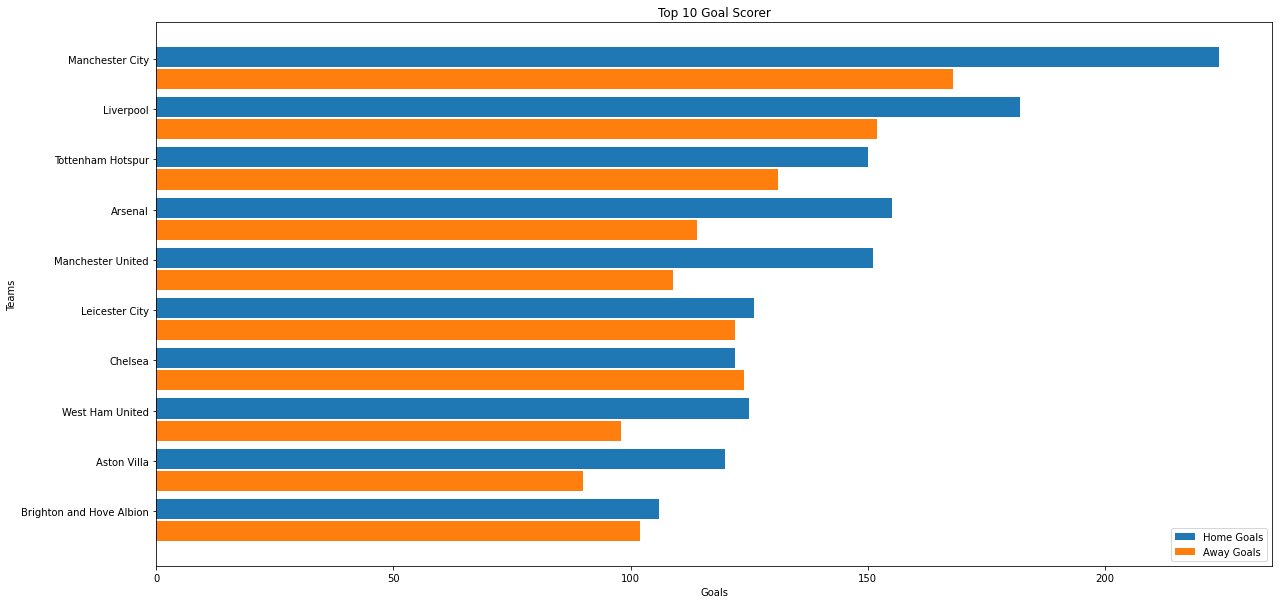

In [14]:
plt.figure(figsize=(20,10))

Teams = new_df["Teams"].head(10).tolist()
Away_goals= new_df["Away"].head(10).tolist()
Home_goals= new_df["Home_goals"].head(10).tolist()

X_axis = np.arange(len(Teams))

plt.barh(X_axis-.04, Home_goals, 0.4, label = 'Home Goals')
plt.barh(X_axis+0.4, Away_goals, 0.4, label = 'Away Goals')
plt.yticks( X_axis, Teams)
plt.xlabel("Goals")
plt.ylabel("Teams")
plt.title("Top 10 Goal Scorer")
plt.gca().invert_yaxis()
plt.legend()
plt.show()


## Description
This bar plot illustrates the leading goal scorers in the Premier League, with Manchester City at the top. Notably, Manchester City's dominance is emphasized by the significantly higher number of home goals compared to away goals, showcasing their formidable home advantage. Brighton and Hove Albion also make the top 5, with a similar focus on home goals.

## 2. Finding the best 5 teams across the seasons

In [15]:
#df = pd.read_csv(r"matches.csv")
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'goals_scored', 'goals_conceded', 'opponent', 'expected_goals',
       'expected_assists', 'possession', 'attendance', 'captain', 'formation',
       'referee', 'shots', 'shots_on_target', 'avg_shot_distance', 'freekicks',
       'penaltykicks', 'penaltykicks_opponent', 'season', 'team'],
      dtype='object')

In [16]:
df.head()

,date,time,comp,round,day,venue,result,goals_scored,goals_conceded,opponent,...,formation,referee,shots,shots_on_target,avg_shot_distance,freekicks,penaltykicks,penaltykicks_opponent,season,team
0,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0.0,0.0,2023,Manchester City
1,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0.0,0.0,2023,Manchester City
2,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Sheffield Utd,...,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0.0,1.0,2023,Manchester City
3,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5.0,1.0,Fulham,...,4-2-3-1,Michael Oliver,6.0,4.0,14.8,0.0,1.0,1.0,2023,Manchester City
4,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,West Ham,...,4-2-3-1,Andy Madley,29.0,13.0,16.4,1.0,0.0,0.0,2023,Manchester City


### Description
Every season, bottom 3 teams are relegated (demoted) to a lower level and 3 new teams from the lower league are promoted to the premier league.

Liverpool won the last season but which team is the best when it comes to overall seasons?
Let's find out

# Grouping Data based on Team

In [29]:
#query1 = "SELECT team, COUNT(*) as Matches_Played FROM df GROUP BY team ORDER BY COUNT(*) DESC;"
query1 = "SELECT team, count(*) as Matches_Played FROM df Group By team order by count(*) desc"
result1 = sqldf(query1)
#result1

# Finding total matches won by each team

In [19]:
query2 = "SELECT team, count(*) as Matches_Won FROM df where result ='W' Group By team order by count(*) desc"
result2 = sqldf(query2)
result2

,team,Matches_Won
0,Manchester City,115
1,Liverpool,103
2,Arsenal,84
3,Manchester United,80
4,Tottenham Hotspur,78
5,Chelsea,72
6,Leicester City,61
7,West Ham United,59
8,Aston Villa,59
9,Newcastle United,57


# Joining Data to get combined result

In [20]:
query3 = 'SELECT a.team as Team, a.Matches_Played, b.Matches_Won FROM result1 a join result2 b on a.team=b.team'
result3 = sqldf(query3)

In [21]:
result3['Win Percentage'] = round(result3['Matches_Won']/result3['Matches_Played'],2)*100

# Fetching Top 5 clubs

In [22]:
result3 = result3.sort_values(by=['Win Percentage'],ascending=False).head(5)

In [23]:
result3

,Team,Matches_Played,Matches_Won,Win Percentage
5,Manchester City,157,115,73.0
6,Liverpool,157,103,66.0
12,Arsenal,157,84,54.0
4,Manchester United,157,80,51.0
2,Tottenham Hotspur,157,78,50.0


# Plotting Graph

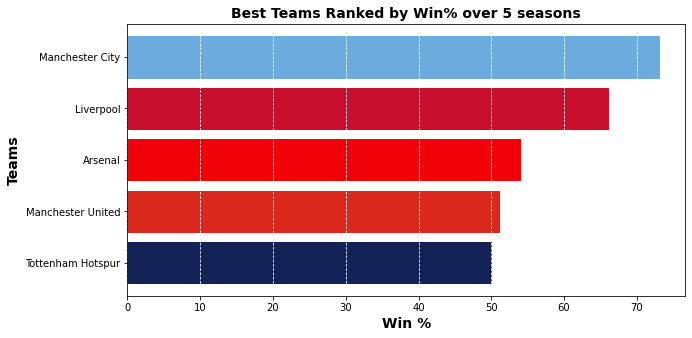

In [30]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
barlist = plt.barh(result3['Team'], result3['Win Percentage'], color ='blue'
                  # ,width = 0.3
                  )

barlist[0].set_color('#6CABDD')
barlist[1].set_color('#C8102E')
barlist[2].set_color('#EF0107')
barlist[3].set_color('#DA291C')
barlist[4].set_color('#132257')

#plt.rcParams['axes.facecolor'] = '#FDE5B4'

plt.xlabel("Win %",fontweight='bold',fontsize=14.0)
#plt.xticks(rotation='vertical')
plt.ylabel("Teams",fontweight='bold',fontsize=14.0)
plt.title("Best Teams Ranked by Win% over 5 seasons",fontweight='bold',fontsize=14.0)
plt.grid(axis='x',color = 'white', linestyle = '--')
plt.gca().invert_yaxis()
plt.show()

## 3. Seasonally scored goals:

In [25]:
# Get the Top 10 teams and see their performance with respect to time
ttl_goals_per_teams = df.groupby('team')['goals_scored'].sum().reset_index(name='count').sort_values(by='count', ascending=False)
ttl_goals_per_teams = ttl_goals_per_teams.reset_index()
top = list(ttl_goals_per_teams['team'][:5])

# Dataframe of only top 5
df2 = df[df['team'].isin(top)]

# Dataframe of sum of goals_scored of only top 5 per season
t1 = df2.groupby(['team', 'season'])['goals_scored'].sum().reset_index()

# Dataframe of avg of goals_scored of only top 5 per season
t2 = df2.groupby(['team', 'season'])['goals_scored'].mean().reset_index()

# Dataframe of avg of goals_scored of only top 5 per season
t3 = df2.groupby(['team', 'round', 'season'])['goals_scored'].mean().reset_index()


> **Note 1:** The 2023 season is not over yet, and it being shown on the graph might be misleading (as in the teams' seasonal goal scores are getting worse)
It might be more maeningful to look at average scored goals to include 2023 in our analysis as well.

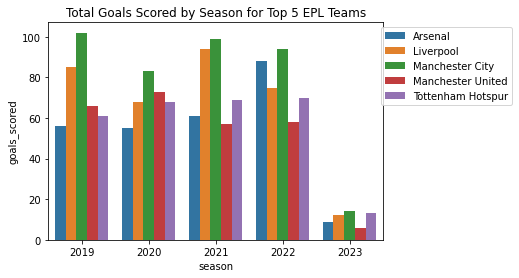

In [26]:
### Sum of seasonally scored goals for top 5:
sb.barplot(x = t1["season"], y = t1["goals_scored"], hue = "team", data= t1)
plt.title('Total Goals Scored by Season for Top 5 EPL Teams')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

### Description
Arsenal and Tottenham Hotspur's performance are slowly increasing over time between 2019 and 2022.
Manchester United's performance is increasing from 2019 by a bit in 2020 then decreasing in 2021 to become about the same in 2022
Liverpool's seasonal goal scores are decreasing from 2019 to 2020, then increasing in 2021, and decreasing once again in 2022.

Overall, it seems that Manchester City, compared to the other top 5 teams, is able to maintain the highest seasonal goals scored from one year to the next.



> **Note 2:** We know that goal scores are not typically a float type but for the sake of comparability between 2023 and previous years, we will be using float to talk about average goals scored.





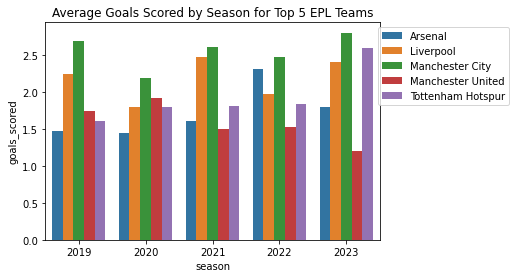

In [27]:
### Seasonally scored goals on average for top 5:
sb.barplot(x = t2["season"], y = t2["goals_scored"], hue = "team", data= t2)
plt.title('Average Goals Scored by Season for Top 5 EPL Teams')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

### Description
On average, it seems that Manchester City, compared to the other top5 teams, is able to maintain the highest seasonal goals scored from one year to the next.

In 2023, it looks like Tottenham Hotspuris competing fiercely, ranking 2nd on average, as opposed to previous years where it was third or fourth.
Liverpool is a strong competitor against Manchester City (1st team) and is ranking either 2nd or 3rd at most.

The average goals scored of Manchester United looks like they are decreasing over time. In the last three years, it is even raking the last among the Top 5.


## 4. ......... [Yashwant add title of your analysis here]

# Yashwant Analysis and Visual (to be added)

## Conclusion

In conclusion, Manchester City maintains dominance with consistent high goal-scoring and a strong home advantage. Arsenal and Tottenham show steady improvement, while Manchester United's performance fluctuates. Liverpool's scoring is inconsistent, and Brighton and Hove Albion make a notable appearance. These trends highlight the dynamic nature of Premier League competition from 2019 to 2022.